<a href="https://colab.research.google.com/github/UTEDungNguyen/AI-Homework04/blob/main/A_fuzzy_vacuum_cleaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a81f539407d971f5dec09d9a1aac427a37632027224913f2e04a4f1d8b73871c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

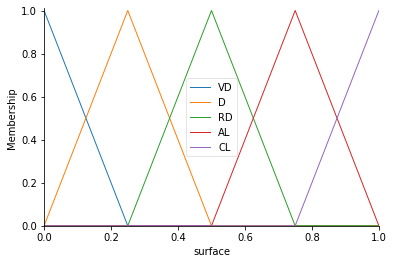

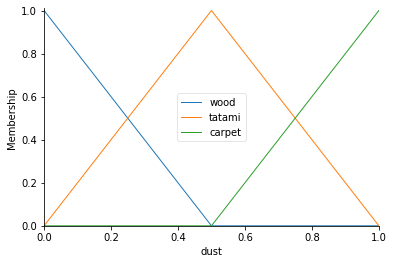

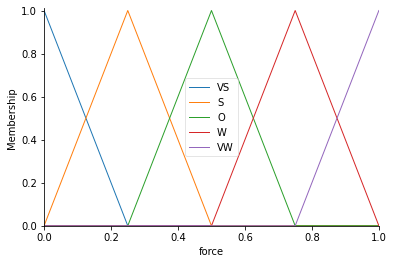

In [6]:
universe = np.linspace(0,1,61)
surface = ctrl.Antecedent(universe,'surface')
dust = ctrl.Antecedent(universe,'dust')
force = ctrl.Consequent(universe, 'force')
names =['VD','D','RD','AL','CL']
names1 =['VS','S','O','W','VW']
names2 =['wood','tatami','carpet']
surface.automf(names=names)
dust.automf(names=names2)
force.automf(names=names1)
surface.view()
dust.view()
force.view()

In [4]:
rule0 = ctrl.Rule(antecedent=((surface['CL']&dust['wood'])|(surface['AL']&dust['wood'])|(surface['CL']&dust['tatami'])),consequent=force['VW'],label= 'VW')
rule1 = ctrl.Rule(antecedent=((surface['CL']&dust['carpet'])|(surface['AL']&dust['tatami'])|(surface['RD']&dust['wood'])),consequent=force['W'],label= 'W')
rule2 = ctrl.Rule(antecedent=((surface['AL']&dust['carpet'])|(surface['RD']&dust['carpet'])|(surface['RD']&dust['tatami'])|(surface['D']&dust['wood'])),consequent=force['O'],label= 'O')
rule3 = ctrl.Rule(antecedent=((surface['D']&dust['carpet'])|(surface['D']&dust['tatami'])|(surface['VD']&dust['wood'])),consequent=force['S'],label= 'S')
rule4 = ctrl.Rule(antecedent=((surface['VD']&dust['carpet'])|(surface['VD']&dust['tatami'])),consequent=force['VS'],label= 'VS')

<ipython-input-33-152b20c7bade>:19: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=0,cmap='viridis',anpha=0.5)
<ipython-input-33-152b20c7bade>:20: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=1.5,cmap='viridis',anpha=0.5)
<ipython-input-33-152b20c7bade>:21: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=1.05,cmap='viridis',anpha=0.5)


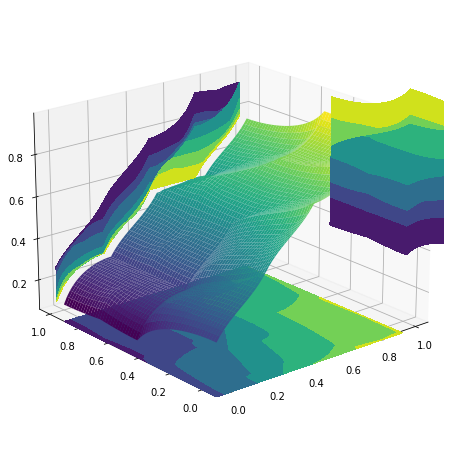

In [33]:
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run= 61*61+1)
upsampled =  np.linspace(0,1,61)
upsampled2 = np.linspace(0,1,61)
x,y = np.meshgrid(upsampled2,upsampled)
z= np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['surface']= x[i,j]
    sim.input['dust']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['force']

fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')

suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4,antialiased= True)
cset = ax.contourf(x,y,z,zdir='z',offset=0,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=1.5,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=1.05,cmap='viridis',anpha=0.5)
ax.view_init(20,230)